Lung Cancer Research Project

In this project we are looking at a study of patients with lung cancer, and trying to determine what risk factors played into their level of cancer. We wanted to look at different subgroups (Age and Gender) to determine how different groups of people's factors were at play. 
Some quetions we wanted to answer:
1. Are the risk factors different for young vs old patients?
2. Relation of pollution level to level of cancer?
3. What are the risk factors in patients who have low-level smoking? (Active smoking vs passive smoking)
4. Are men or women more likely to develop lung cancer?
5. Relation of smoking level to level of cancer?
6. Relation of alcohol and smoking in the patients 
7. Obesity and level of cancer relation

Cleaning and data setup

In [52]:
#import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [5]:
#set file path
cancer_data_path = "../Resources/cancer patient data sets.csv"
#read the file path
cancer_data = pd.read_csv(cancer_data_path)
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
#check that the data is clean - check for duplicate values in Patient ID
cancer_data["Patient Id"].nunique()

1000

In [12]:
#cleaning data - checking that all columns are filled out
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [15]:
#cleaning data - create new data frame that removes excess columnns
clean_cancer = cancer_data[["Patient Id", "Age", "Gender", "Air Pollution", "Alcohol use", "Genetic Risk", "Obesity", "Smoking", "Passive Smoker", "Level"]]
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,1,2,4,3,4,3,2,Low
1,P10,17,1,3,1,4,2,2,4,Medium
2,P100,35,1,4,5,5,7,2,3,High
3,P1000,37,1,7,7,6,7,7,7,High
4,P101,46,1,6,8,7,7,8,7,High


In [27]:
#cleaning data - replace "1" in Gender to Male and "2" to Female
clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"
clean_cancer.loc[clean_cancer["Gender"] == 2, "Gender"] = "Female"
clean_cancer

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,Male,2,4,3,4,3,2,Low
1,P10,17,Male,3,1,4,2,2,4,Medium
2,P100,35,Male,4,5,5,7,2,3,High
3,P1000,37,Male,7,7,6,7,7,7,High
4,P101,46,Male,6,8,7,7,8,7,High
...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,8,High
996,P996,37,Female,6,8,7,7,7,8,High
997,P997,25,Female,4,5,5,7,2,3,High
998,P998,18,Female,6,8,7,7,8,7,High


In [104]:
clean_cancer = clean_cancer.copy()

In [105]:
clean_cancer.dtypes

Patient Id          object
Age                  int64
Gender              object
Air Pollution        int64
Alcohol use          int64
Genetic Risk         int64
Obesity              int64
Smoking              int64
Passive Smoker       int64
Level               object
Age Group         category
dtype: object

Entire Dataset Analysis

In [138]:
#Look at level of cancer across the sample of patients
levels_labels = clean_cancer["Level"].value_counts()
levels_labels

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

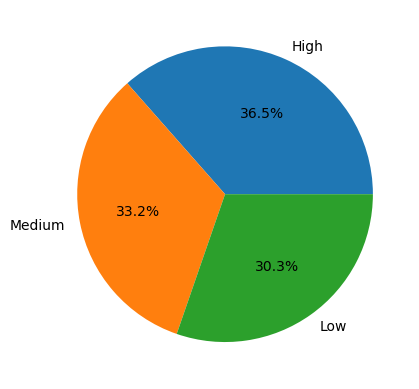

In [139]:
#create a pie chart showing the level of cancer across patients
plt.pie(levels_labels, labels=levels_labels.index,
        autopct="%1.1f%%")
plt.show()

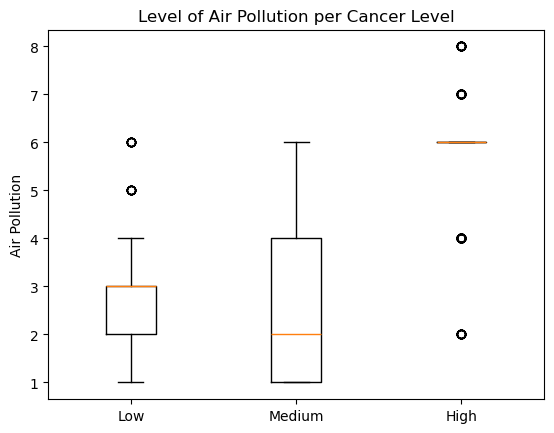

In [107]:
#create a box plot showing level of air pollution to level of cancer
levels = ["Low", "Medium", "High"]
air_pollution = []

for level in levels:
    pollution_value = clean_cancer.loc[clean_cancer["Level"] == level,"Air Pollution"]
    air_pollution.append(pollution_value)
    quartiles = pollution_value.quantile([0.25,0.5,0.75])

plt.ylabel("Air Pollution")
plt.boxplot(air_pollution, labels=levels)
plt.title("Level of Air Pollution per Cancer Level")
plt.show()


Gender and Risk Factors

In [108]:
#prepare data to plot ratio of men to women
gender_counts = clean_cancer["Gender"].value_counts()
gender_counts

Gender
Male      598
Female    402
Name: count, dtype: int64

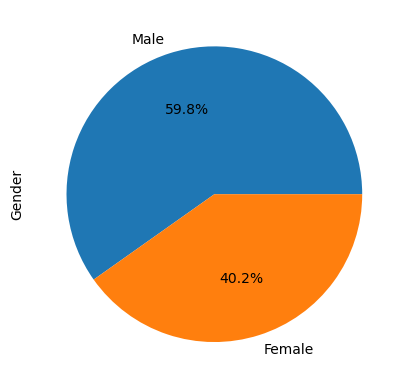

In [109]:
#plot the ratio of men to women in the study
pie_graph = gender_counts.plot(kind="pie", y="Gender", autopct='%1.1f%%')
pie_graph.set_ylabel("Gender")
plt.show()

In [110]:
#create the gender subgroups
male_group = clean_cancer.loc[clean_cancer["Gender"] == "Male"]
female_group = clean_cancer.loc[clean_cancer["Gender"]== "Female"]

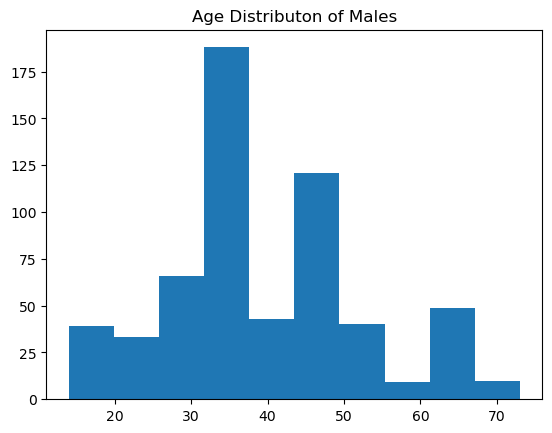

In [225]:
#plot a histogram of the breakdown of the age of the male patients
plt.hist(male_group["Age"])
plt.title("Age Distributon of Males")
plt.show()

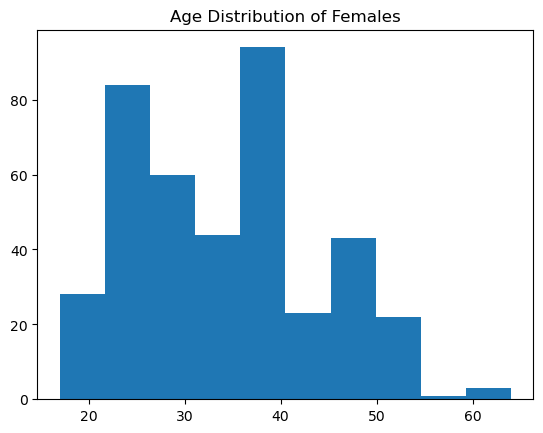

In [224]:
#same for female
plt.hist(female_group["Age"])
plt.title("Age Distribution of Females")
plt.show()

In [111]:
#Find the average level of alcohol use, obseity, and smoking for male and female groups
male_alcohol = male_group["Alcohol use"].mean()
female_alcohol = female_group["Alcohol use"].mean()
male_obesity = male_group["Obesity"].mean()
female_obesity = female_group["Obesity"].mean()
male_smoking = male_group["Smoking"].mean()
female_smoking = female_group["Smoking"].mean()


In [112]:
#create function to plot male vs female average risk factors

def plots (y_axis, y_label, title):
    x_axis = ["Male", "Female"]
    colors=["blue", "red"]
    plt.bar(x_axis, y_axis, color=colors)
    plt.ylabel(y_label)
    plt.xlabel("Gender")
    plt.title(title)
    plt.show()


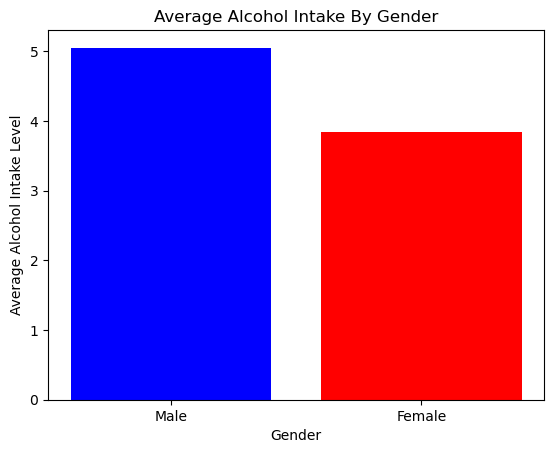

In [69]:
#plot averages for alcohol consumption
y = [male_alcohol, female_alcohol]
plots (y, "Average Alcohol Intake Level", "Average Alcohol Intake By Gender")

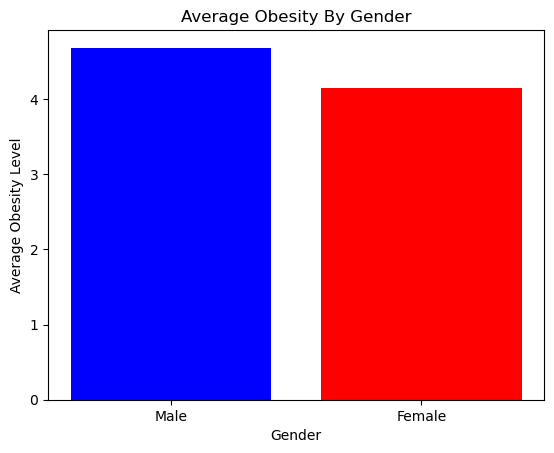

In [72]:
#plot obesity averages
y = [male_obesity, female_obesity]
plots (y, "Average Obesity Level", "Average Obesity By Gender")

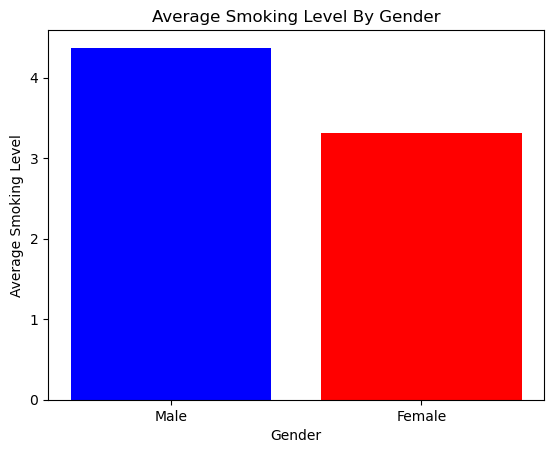

In [73]:
#plot smoking averages
y = [male_smoking, female_smoking]
plots (y, "Average Smoking Level", "Average Smoking Level By Gender")

In [154]:
#get a data frame of level of cancer counts in male vs female
male_levels = male_group["Level"].value_counts()
female_levels = female_group["Level"].value_counts()
gender_data = {
    "Male": male_levels,
    "Female": female_levels}

gender_level_counts = pd.DataFrame(gender_data)
gender_level_counts

,Male,Female
Level,,
High,252,113
Low,149,154
Medium,197,135


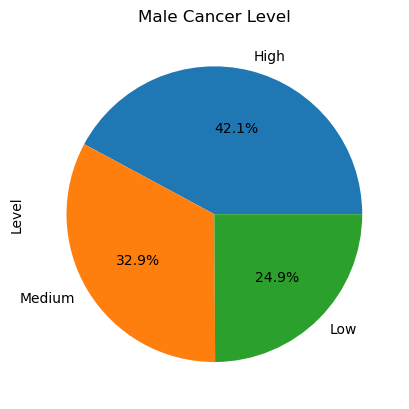

In [134]:
#create a pie chart for each gender to look a levels of cancer per gender
male_levels = male_group["Level"].value_counts()
pie_graph = male_levels.plot(kind="pie", y="Level", autopct='%1.1f%%', title = "Male Cancer Level")
pie_graph.set_ylabel("Level")
plt.show()

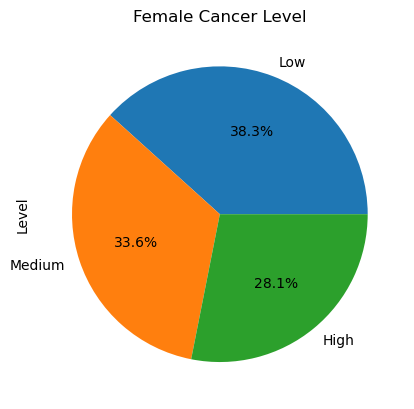

In [133]:
female_levels = female_group["Level"].value_counts()
pie_graph = female_levels.plot(kind="pie", y="Level", autopct='%1.1f%%', title="Female Cancer Level")
pie_graph.set_ylabel("Level")
plt.show()

Data Based on Age Groups

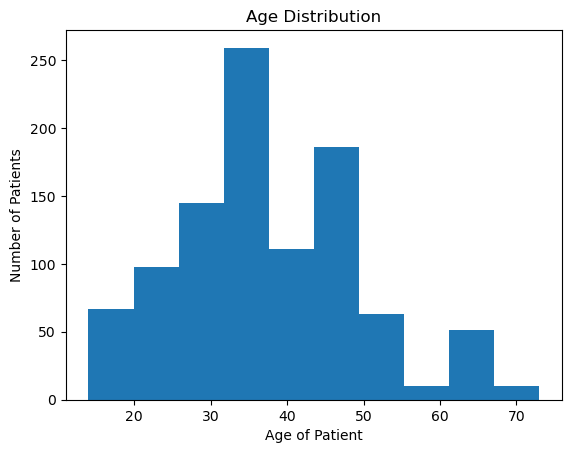

In [168]:
#histogram of age 
plt.hist(clean_cancer["Age"])
plt.xlabel("Age of Patient")
plt.ylabel("Number of Patients")
plt.title("Age Distribution")
plt.show()

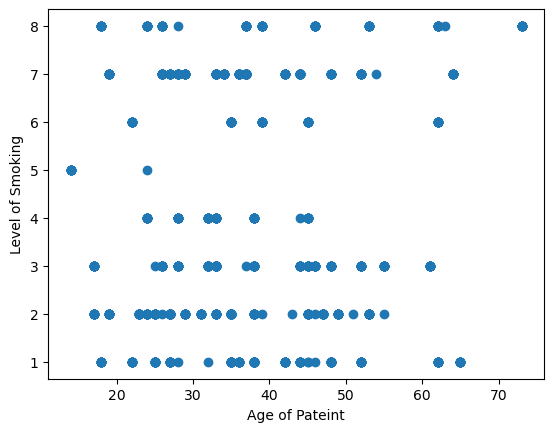

In [167]:
#scatter plot of age vs smoking level
plt.scatter(clean_cancer["Age"], clean_cancer["Smoking"])
plt.xlabel("Age of Pateint")
plt.ylabel("Level of Smoking")
plt.show()

In [113]:
#find the high, low, and middle of the age groups
print(clean_cancer["Age"].max())
print(clean_cancer["Age"].min())
print(clean_cancer["Age"].median())

73
14
36.0


In [116]:
#create bins 
age_bins = [14, 35, 55, 75]
age_labels = ["Young", "Middle Age", "Old"]

In [118]:
#use pd.cut to categorize age based on the bins
clean_cancer["Age Group"] = pd.cut(clean_cancer["Age"], 
                                age_bins, labels=age_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group
0,P1,33,Male,2,4,3,4,3,2,Low,Young
1,P10,17,Male,3,1,4,2,2,4,Medium,Young
2,P100,35,Male,4,5,5,7,2,3,High,Young
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age


In [119]:
#bin by level of smoking
smoking_bins = [1, 5, 9]
smoking_labels = ["Low Smoking Habit", "High Smoking Habit"]

In [124]:
#deleting typo column
del clean_cancer["Smaoking Habit"]

In [125]:
clean_cancer["Smoking Habit"] = pd.cut(clean_cancer["Smoking"], smoking_bins, 
                                        labels=smoking_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group,Alcohol Use,Smoking Habit
0,P1,33,Male,2,4,3,4,3,2,Low,Young,Low Alcohol Use,Low Smoking Habit
1,P10,17,Male,3,1,4,2,2,4,Medium,Young,Low Alcohol Use,Low Smoking Habit
2,P100,35,Male,4,5,5,7,2,3,High,Young,Low Alcohol Use,Low Smoking Habit
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age,High Alcohol Use,High Smoking Habit
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age,High Alcohol Use,High Smoking Habit


In [126]:
#alcohol use bins
alcohol_bins = [1, 5, 9]
alcohol_labels = ["Low Alcohol Use", "High Alcohol Use"]
clean_cancer["Alcohol Use"] = pd.cut(clean_cancer["Alcohol use"], alcohol_bins, 
                                        labels=alcohol_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group,Alcohol Use,Smoking Habit
0,P1,33,Male,2,4,3,4,3,2,Low,Young,Low Alcohol Use,Low Smoking Habit
1,P10,17,Male,3,1,4,2,2,4,Medium,Young,Low Alcohol Use,Low Smoking Habit
2,P100,35,Male,4,5,5,7,2,3,High,Young,Low Alcohol Use,Low Smoking Habit
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age,High Alcohol Use,High Smoking Habit
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age,High Alcohol Use,High Smoking Habit


In [127]:
#genetic risk bins
genetic_bins = [1, 5, 9]
genetic_labels = ["Low Genetic Risk", "High Genetic Risk"]
clean_cancer["Genetic Risk Level"] = pd.cut(clean_cancer["Genetic Risk"], genetic_bins, 
                                        labels=genetic_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group,Alcohol Use,Smoking Habit,Genetic Risk Level
0,P1,33,Male,2,4,3,4,3,2,Low,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk
1,P10,17,Male,3,1,4,2,2,4,Medium,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk
2,P100,35,Male,4,5,5,7,2,3,High,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk


In [128]:
#air pollution bins
air_bins = [1, 5, 9]
air_labels = ["Low Air Pollution", "High Air Pollution"]
clean_cancer["Air Pollution Level"] = pd.cut(clean_cancer["Air Pollution"], air_bins, 
                                        labels=air_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group,Alcohol Use,Smoking Habit,Genetic Risk Level,Air Pollution Level
0,P1,33,Male,2,4,3,4,3,2,Low,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution
1,P10,17,Male,3,1,4,2,2,4,Medium,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution
2,P100,35,Male,4,5,5,7,2,3,High,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk,High Air Pollution
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk,High Air Pollution


In [129]:
#obesity bins
obesity_bins = [1, 5, 9]
obesity_labels = ["Low Obesity Level", "High Obesity Level"]
clean_cancer["Obesity Level"] = pd.cut(clean_cancer["Obesity"], obesity_bins, 
                                        labels=obesity_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Age Group,Alcohol Use,Smoking Habit,Genetic Risk Level,Air Pollution Level,Obesity Level
0,P1,33,Male,2,4,3,4,3,2,Low,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution,Low Obesity Level
1,P10,17,Male,3,1,4,2,2,4,Medium,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution,Low Obesity Level
2,P100,35,Male,4,5,5,7,2,3,High,Young,Low Alcohol Use,Low Smoking Habit,Low Genetic Risk,Low Air Pollution,High Obesity Level
3,P1000,37,Male,7,7,6,7,7,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk,High Air Pollution,High Obesity Level
4,P101,46,Male,6,8,7,7,8,7,High,Middle Age,High Alcohol Use,High Smoking Habit,High Genetic Risk,High Air Pollution,High Obesity Level


In [142]:
#create Age Group DFs
young_group = clean_cancer.loc[clean_cancer["Age Group"] == "Young"]
middle_group = clean_cancer.loc[clean_cancer["Age Group"]== "Middle Age"]
old_group = clean_cancer.loc[clean_cancer["Age Group"] == "Old"]

In [153]:
young_smoke = young_group["Smoking Habit"].value_counts()
middle_smoke = middle_group["Smoking Habit"].value_counts()
old_smoke = old_group["Smoking Habit"].value_counts()

data = {
    'Young': young_smoke,
    'Middle': middle_smoke,
    'Old': old_smoke
}

smoking_habit_counts = pd.DataFrame(data)
smoking_habit_counts

,Young,Middle,Old
Smoking Habit,,,
Low Smoking Habit,353,261,30
High Smoking Habit,144,171,41


In [192]:
#make a data frame for air pollution
young_air = young_group["Air Pollution Level"].value_counts()
middle_air = middle_group["Air Pollution Level"].value_counts()
old_air = old_group["Air Pollution Level"].value_counts()

air_data = {
    'Young': young_air,
    'Middle': middle_air,
    'Old': old_air
}

air_age_counts = pd.DataFrame(air_data)
air_age_counts

,Young,Middle,Old
Air Pollution Level,,,
Low Air Pollution,344,251,30
High Air Pollution,153,181,41


In [191]:
#make a data frame for obesity
young_obesity = young_group["Obesity Level"].value_counts()
middle_obesity = middle_group["Obesity Level"].value_counts()
old_obesity = old_group["Obesity Level"].value_counts()

obesity_data = {
    'Young': young_obesity,
    'Middle': middle_obesity,
    'Old': old_obesity
}

obesity_age_counts = pd.DataFrame(obesity_data)
obesity_age_counts

,Young,Middle,Old
Obesity Level,,,
Low Obesity Level,315,248,51
High Obesity Level,182,184,20


In [190]:
#make a data frame for alcohol use
young_alcohol = young_group["Alcohol Use"].value_counts()
middle_alcohol = middle_group["Alcohol Use"].value_counts()
old_alcohol = old_group["Alcohol Use"].value_counts()

alcohol_data = {
    'Young': young_alcohol,
    'Middle': middle_alcohol,
    'Old': old_alcohol
}

alcohol_age_counts = pd.DataFrame(alcohol_data)
alcohol_age_counts

,Young,Middle,Old
Alcohol Use,,,
Low Alcohol Use,294,251,20
High Alcohol Use,203,181,51


In [189]:
#data frame for genetic risk
#make a data frame for alcohol use
young_genetics = young_group["Genetic Risk Level"].value_counts()
middle_genetics = middle_group["Genetic Risk Level"].value_counts()
old_genetics = old_group["Genetic Risk Level"].value_counts()

genetics_data = {
    'Young': young_genetics,
    'Middle': middle_genetics,
    'Old': old_genetics
}

genetics_counts = pd.DataFrame(genetics_data)
genetics_counts
genetics_counts = genetics_counts.T
genetics_counts

Genetic Risk Level,Low Genetic Risk,High Genetic Risk
Young,294,203
Middle,251,181
Old,20,51


In [203]:
#transpose data so all indexes are on age groups

#smoking_habit_counts = smoking_habit_counts.T
#air_age_counts = air_age_counts.T
#obesity_age_counts = obesity_age_counts.T
#alcohol_age_counts = alcohol_age_counts.T
print(smoking_habit_counts)
print(air_age_counts)
print(obesity_age_counts)
print(alcohol_age_counts)


Smoking Habit  Low Smoking Habit  High Smoking Habit
Young                        353                 144
Middle                       261                 171
Old                           30                  41
Air Pollution Level  Low Air Pollution  High Air Pollution
Young                              344                 153
Middle                             251                 181
Old                                 30                  41
Obesity Level  Low Obesity Level  High Obesity Level
Young                        315                 182
Middle                       248                 184
Old                           51                  20
Alcohol Use  Low Alcohol Use  High Alcohol Use
Young                    294               203
Middle                   251               181
Old                       20                51


In [207]:
#merge the data frames together
merged_data = pd.merge(genetics_counts, smoking_habit_counts, left_index=True, right_index=True, how='inner')
merg1 = pd.merge(merged_data, air_age_counts, left_index=True, right_index=True, how="inner")
merg2 = pd.merge(merg1, obesity_age_counts, left_index=True, right_index=True, how="inner")
merg3 = pd.merge(merg2, alcohol_age_counts, left_index=True, right_index=True, how="inner")
merg3

,Low Genetic Risk,High Genetic Risk,Low Smoking Habit,High Smoking Habit,Low Air Pollution,High Air Pollution,Low Obesity Level,High Obesity Level,Low Alcohol Use,High Alcohol Use
Young,294,203,353,144,344,153,315,182,294,203
Middle,251,181,261,171,251,181,248,184,251,181
Old,20,51,30,41,30,41,51,20,20,51


In [214]:
young_all_risks = merg3.loc["Young"]
middle_all_risks = merg3.loc["Middle"]
old_all_risks = merg3.loc["Old"]

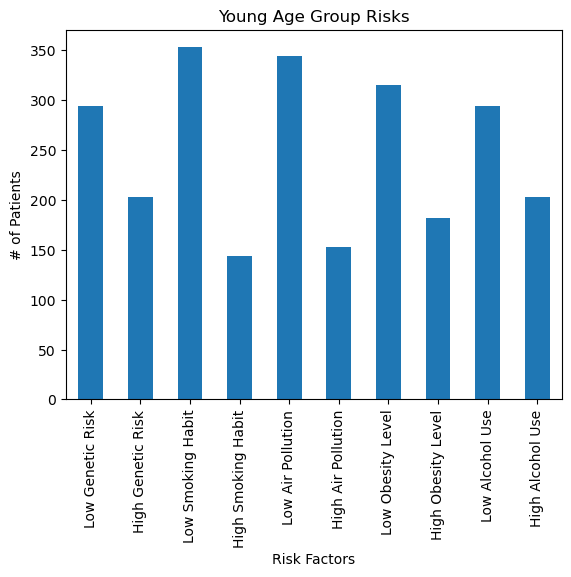

In [219]:
young_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Young Age Group Risks")
plt.show()

<Axes: title={'center': 'Middle Age Group Risks'}, xlabel='Risk Factors', ylabel='# of Patients'>

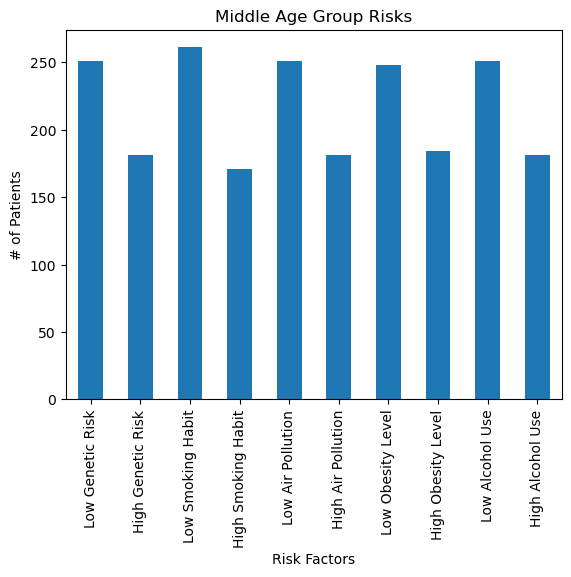

In [218]:
middle_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Middle Age Group Risks")

<Axes: title={'center': 'Old Age Group Risks'}, xlabel='Risk Factors', ylabel='# of Patients'>

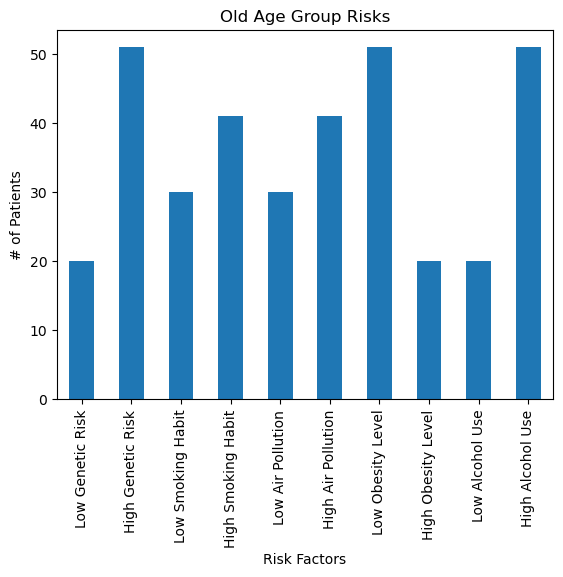

In [220]:
old_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Old Age Group Risks")

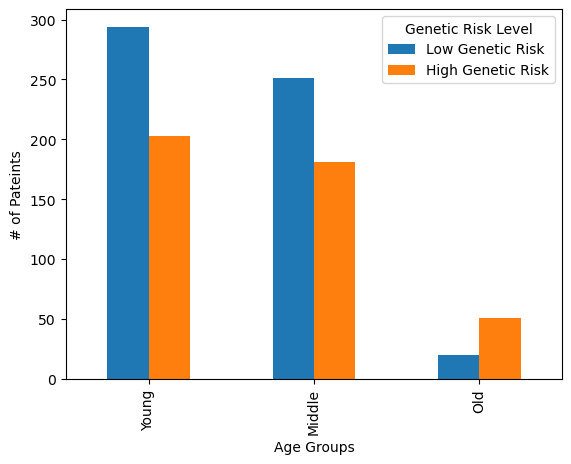

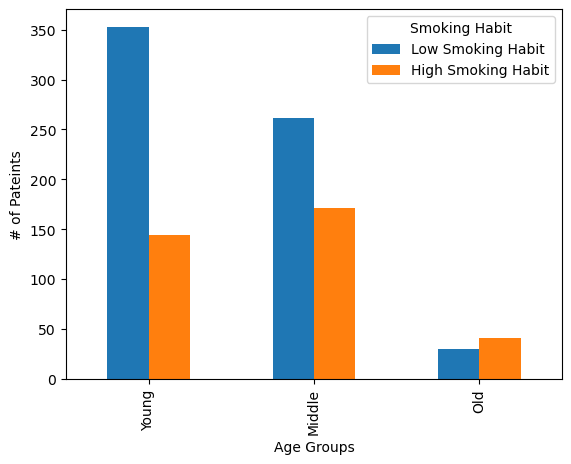

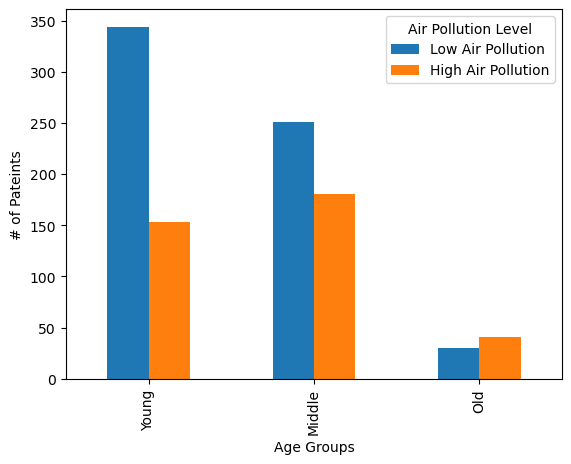

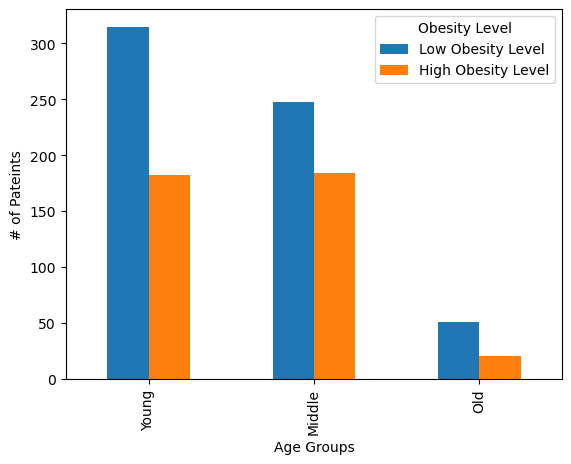

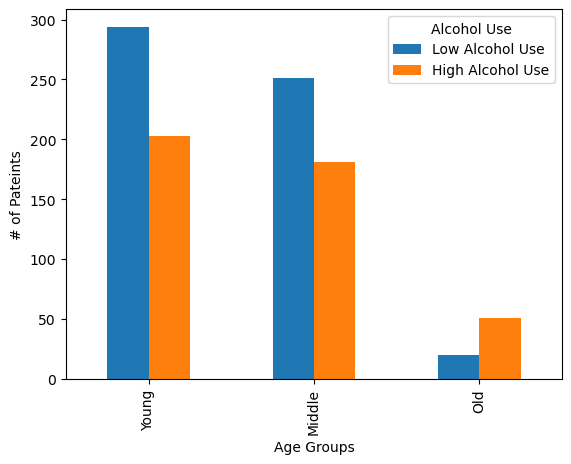

In [210]:
#make a bar graph showing all the different risk factos by age group
genetics_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
smoking_habit_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
air_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
obesity_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
alcohol_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")

plt.show()